In [0]:
%python
# Import necessary libraries
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.types import DoubleType, IntegerType, StringType, StructType, StructField

# Define variables used in the code below
file_path = "/databricks-datasets/songs/data-001/"
table_name = "raw_song_data"
checkpoint_path = "/tmp/pipeline_get_started/_checkpoint/song_data"

schema = StructType(
  [
    StructField("artist_id", StringType(), True),
    StructField("artist_lat", DoubleType(), True),
    StructField("artist_long", DoubleType(), True),
    StructField("artist_location", StringType(), True),
    StructField("artist_name", StringType(), True),
    StructField("duration", DoubleType(), True),
    StructField("end_of_fade_in", DoubleType(), True),
    StructField("key", IntegerType(), True),
    StructField("key_confidence", DoubleType(), True),
    StructField("loudness", DoubleType(), True),
    StructField("release", StringType(), True),
    StructField("song_hotnes", DoubleType(), True),
    StructField("song_id", StringType(), True),
    StructField("start_of_fade_out", DoubleType(), True),
    StructField("tempo", DoubleType(), True),
    StructField("time_signature", DoubleType(), True),
    StructField("time_signature_confidence", DoubleType(), True),
    StructField("title", StringType(), True),
    StructField("year", IntegerType(), True),
    StructField("partial_sequence", IntegerType(), True)
  ]
)

(spark.readStream
  .format("cloudFiles")
  .schema(schema)
  .option("cloudFiles.format", "csv")
  .option("sep","\t")
  .load(file_path)
  .writeStream
  .option("checkpointLocation", checkpoint_path)
  .trigger(availableNow=True)
  .toTable(table_name)
)

spark = SparkSession.builder.appName("ETLExample").getOrCreate()

raw_data = spark.read.table(table_name)

# Create a temporary view for Spark SQL
raw_data.createOrReplaceTempView("songs_data")

# Perform transformations using Spark SQLtitle
transformed_data = spark.sql("""
    SELECT
        artist_id,
        COUNT(title) AS song_count
    FROM
        songs_data
    GROUP BY
        artist_id
    ORDER BY
        song_count DESC
""")

# Store the transformed data in Delta Lake format
delta_path = "/mnt/delta/songs_data"
transformed_data.write.format("delta").mode("overwrite").save(delta_path)

# Perform data validation and error handling
if transformed_data.count() == 0:
    raise ValueError("No data found after transformation.")

# Display the transformed data
display(transformed_data)

artist_id,song_count
ARXRNDO1187FB42BE5,12
ARH861H1187B9B799E,11
AR6PJ8R1187FB5AD70,11
AR20CFC1187B98A25D,10
ARL1AFK1187FB3B05B,10
AR949HL1187B98FAB5,10
AR1EC9B1187FB3ECC5,10
AR3PHA71187FB52512,9
ARK885Q1187FB5398E,9
AR6Q4T91187B995616,9


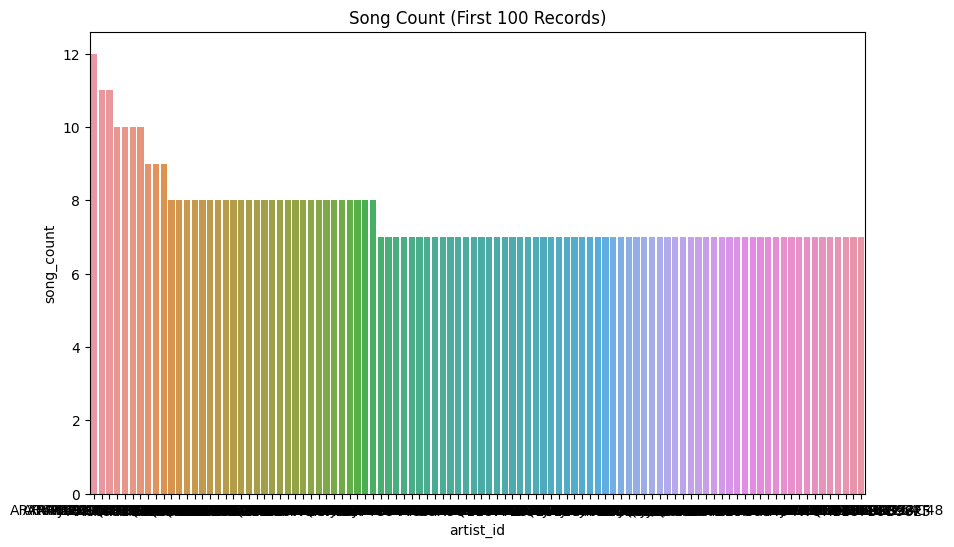

In [0]:
%python
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#Convert Spark DataFrame to Pandas DataFrame for Matplotlib
pandas_data = transformed_data.limit(100).toPandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="artist_id", y="song_count", data=pandas_data)
plt.title("Song Count (First 100 Records)")
plt.show()